In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [97]:
zvezda = pd.read_csv("Stars.csv")

In [98]:
zvezda.head(10)

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,Star category,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,0,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,0,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,0,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,0,Brown Dwarf,Red,M
5,2840,0.000650,0.1100,16.98,0,Brown Dwarf,Red,M
6,2637,0.000730,0.1270,17.22,0,Brown Dwarf,Red,M
7,2600,0.000400,0.0960,17.40,0,Brown Dwarf,Red,M
8,2650,0.000690,0.1100,17.45,0,Brown Dwarf,Red,M
9,2700,0.000180,0.1300,16.05,0,Brown Dwarf,Red,M


## Описание 
Temperature - Температура \
Luminosity - Яркость \
Radius - Радиус \
Absolute magnitude - Абсолютная величина \
Star type - Тип звезды \
Star category - Категория звезды \
Star color - Цвет звезды \
Spectral Class - Спектральный класс 

In [99]:
zvezda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Temperature (K)          240 non-null    int64  
 1   Luminosity (L/Lo)        240 non-null    float64
 2   Radius (R/Ro)            240 non-null    float64
 3   Absolute magnitude (Mv)  240 non-null    float64
 4   Star type                240 non-null    int64  
 5   Star category            240 non-null    object 
 6   Star color               240 non-null    object 
 7   Spectral Class           240 non-null    object 
dtypes: float64(3), int64(2), object(3)
memory usage: 15.1+ KB


In [100]:
zvezda.describe()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
count,240.000000,240.000000,240.000000,240.000000,240.000000
mean,10497.462500,107188.361635,237.157781,4.382396,2.500000
std,9552.425037,179432.244940,517.155763,10.532512,1.711394
min,1939.000000,0.000080,0.008400,-11.920000,0.000000
25%,3344.250000,0.000865,0.102750,-6.232500,1.000000
50%,5776.000000,0.070500,0.762500,8.313000,2.500000
75%,15055.500000,198050.000000,42.750000,13.697500,4.000000
max,40000.000000,849420.000000,1948.500000,20.060000,5.000000


In [101]:
zvezda.min()

Temperature (K)                   1939
Luminosity (L/Lo)              0.00008
Radius (R/Ro)                   0.0084
Absolute magnitude (Mv)         -11.92
Star type                            0
Star category              Brown Dwarf
Star color                        Blue
Spectral Class                       A
dtype: object

In [102]:
zvezda.max()


Temperature (K)                  40000
Luminosity (L/Lo)             849420.0
Radius (R/Ro)                   1948.5
Absolute magnitude (Mv)          20.06
Star type                            5
Star category              White Dwarf
Star color                   yellowish
Spectral Class                       O
dtype: object

## Проверка на нулевые значения


In [103]:
zvezda.isnull().sum()

Temperature (K)            0
Luminosity (L/Lo)          0
Radius (R/Ro)              0
Absolute magnitude (Mv)    0
Star type                  0
Star category              0
Star color                 0
Spectral Class             0
dtype: int64

## Проверка уникальных значений



# Статистика распределения значений признаков

In [104]:
zvezda.nunique()

Temperature (K)            228
Luminosity (L/Lo)          208
Radius (R/Ro)              216
Absolute magnitude (Mv)    228
Star type                    6
Star category                6
Star color                  19
Spectral Class               7
dtype: int64

## Визуальный анализ


In [105]:
# гистограмма для числовых признаковых 

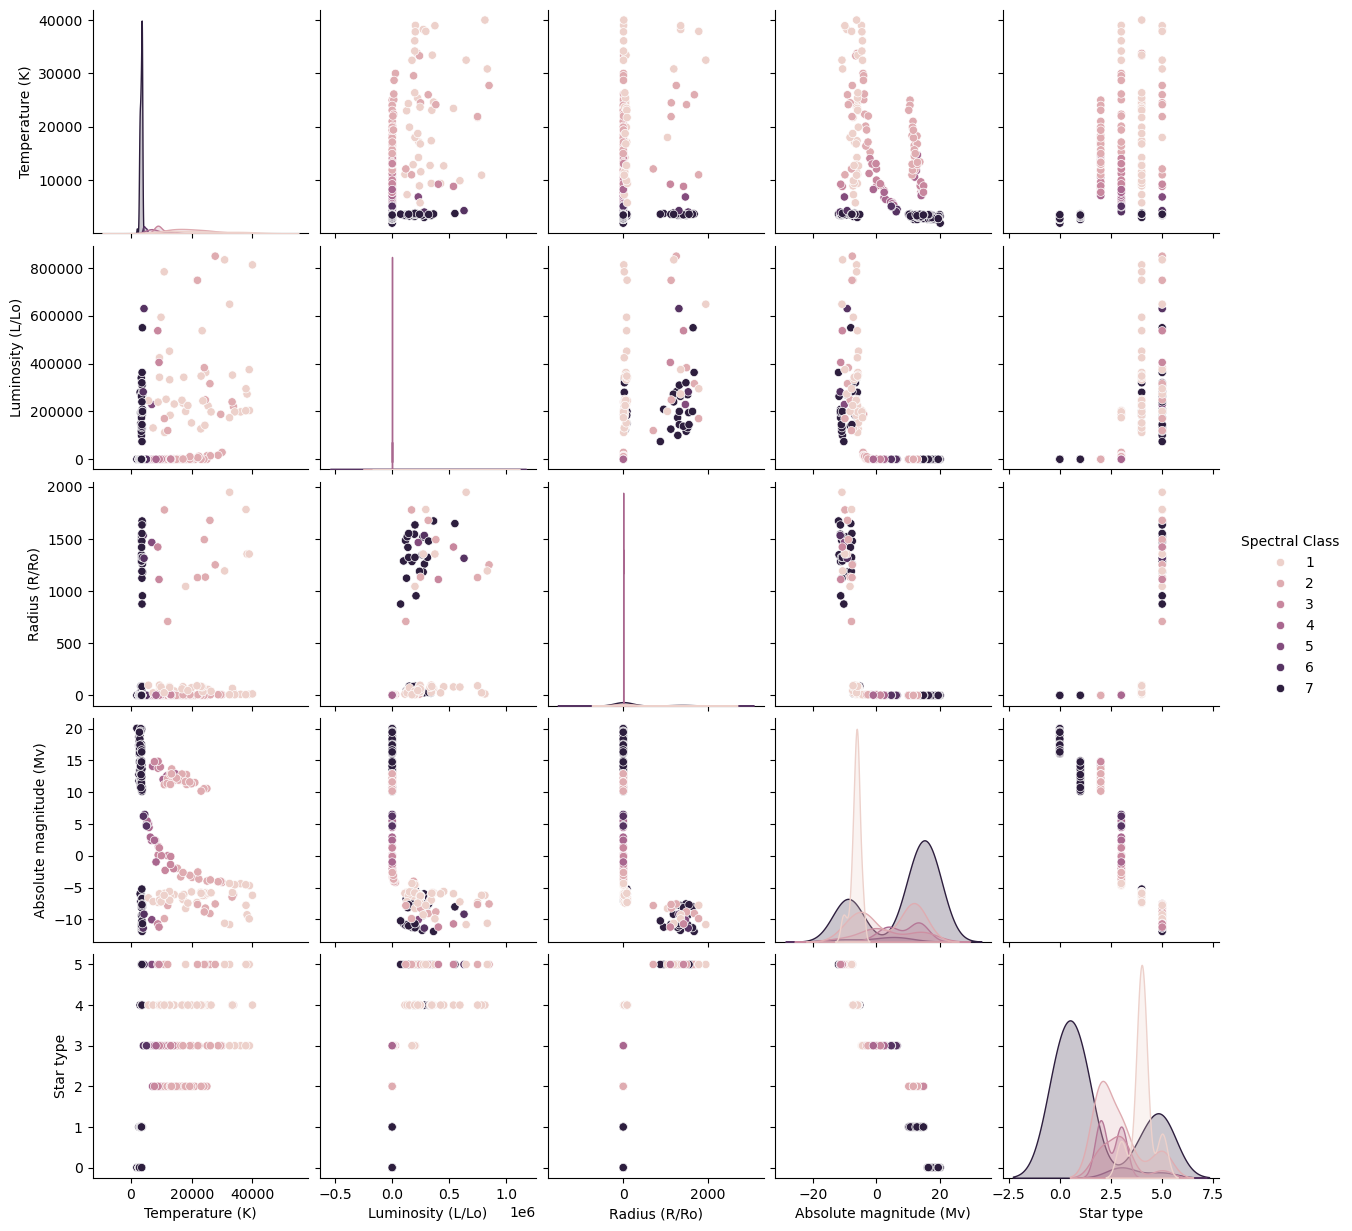

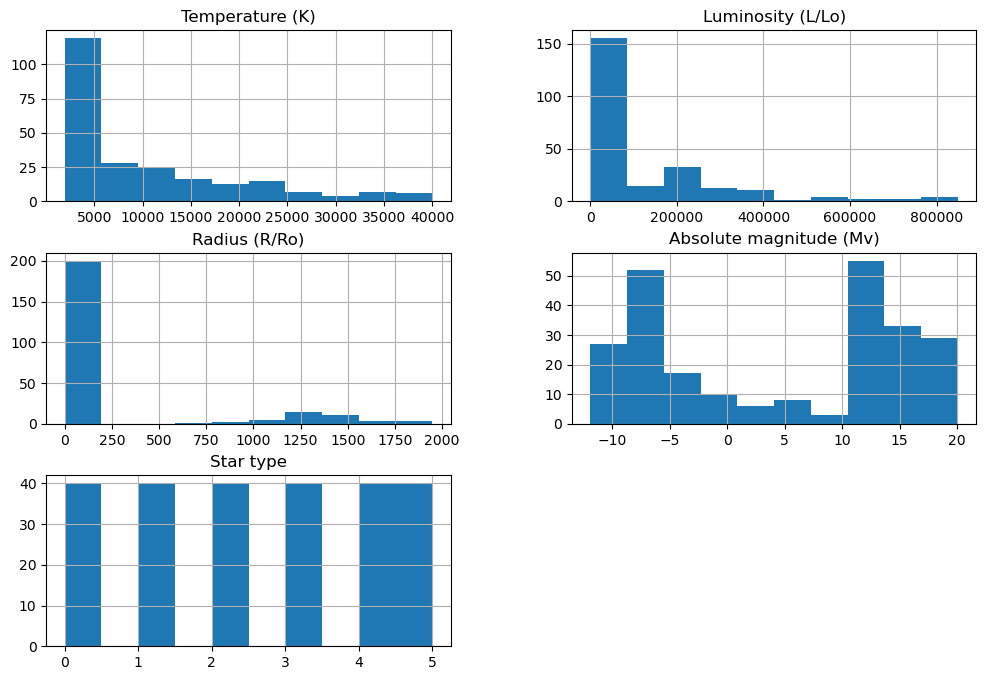

In [106]:
zvezda.hist(figsize=(12, 8))
plt.show()

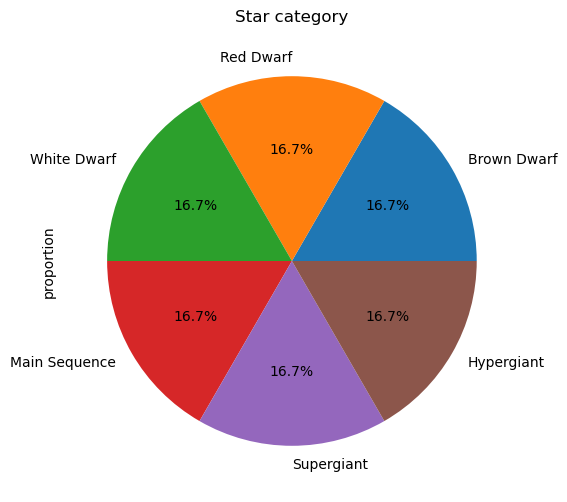

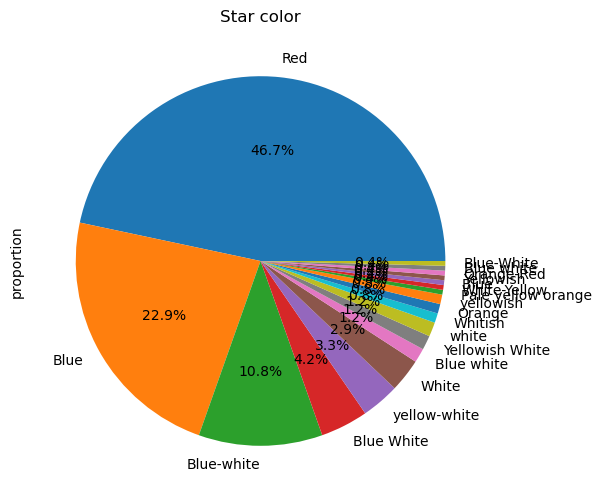

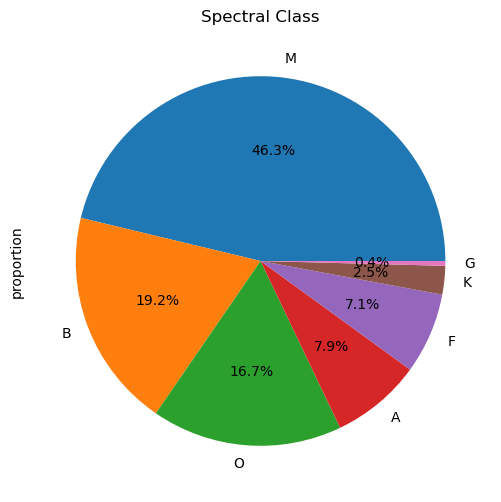

In [107]:
for col in zvezda.select_dtypes(include=['object']).columns:
    zvezda[col].value_counts(normalize=True).plot.pie(autopct='%1.1f%%', figsize=(6, 6))
    plt.title(col)
    plt.show()

In [108]:
# пропущенных данных нет


In [218]:

sns.heatmap(corr, square=True, annot=True, linewidths=.5)

<Axes: >

In [215]:
corr = zvezda[['Temperature (K)','Luminosity (L/Lo)','Radius (R/Ro)','Absolute magnitude (Mv)','Star type']].corr()
corr

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type
Temperature (K),1.000000,0.393404,0.064216,-0.420261,0.411129
Luminosity (L/Lo),0.393404,1.000000,0.526516,-0.692619,0.676845
Radius (R/Ro),0.064216,0.526516,1.000000,-0.608728,0.660975
Absolute magnitude (Mv),-0.420261,-0.692619,-0.608728,1.000000,-0.955276
Star type,0.411129,0.676845,0.660975,-0.955276,1.000000


## 3. Обучение классификатора


In [137]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Geography
star_category = pd.get_dummies(zvezda["Star category"], dtype=int)
star_category.head()

,1.0,2.0,3.0,5.0,6.0
0,1,0,0,0,0
1,1,0,0,0,0
2,1,0,0,0,0
3,1,0,0,0,0
4,1,0,0,0,0


In [138]:
##обучиение моделей данных

In [139]:
column_names = ['Temperature (K)', 'Luminosity (L/Lo)', 'Radius (R/Ro)', 'Absolute magnitude (Mv)', 'Star type']

In [175]:
# объединение изначальных признаков и фиктивных бинарных признаков - формирование матрицы Объекты-признаки
X = pd.concat([zvezda[column_names], star_category], axis = 1)
X.shape

(240, 10)

In [176]:
X.head()

,Temperature (K),Luminosity (L/Lo),Radius (R/Ro),Absolute magnitude (Mv),Star type,1.0,2.0,3.0,5.0,6.0
0,3068,0.002400,0.1700,16.12,0,1,0,0,0,0
1,3042,0.000500,0.1542,16.60,0,1,0,0,0,0
2,2600,0.000300,0.1020,18.70,0,1,0,0,0,0
3,2800,0.000200,0.1600,16.65,0,1,0,0,0,0
4,1939,0.000138,0.1030,20.06,0,1,0,0,0,0


In [177]:
x = zvezda['Spectral Class']

In [178]:
zvezda['Spectral Class'].value_counts()

Spectral Class
7    111
2     46
1     40
3     19
4     17
6      6
5      1
Name: count, dtype: int64

## создание моделей

In [179]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [180]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(160, 10) (80, 10) (160,) (80,)


In [189]:
from sklearn.metrics import accuracy_score

## модели данных 

In [191]:
## KNeighborsClassifier

In [192]:
from sklearn.neighbors import KNeighborsClassifier

In [193]:
%%time
# Convert column names to strings
X.columns = X.columns.astype(str)
knn = KNeighborsClassifier()
knn.fit(X, y)

CPU times: total: 31.2 ms
Wall time: 7 ms


KNeighborsClassifier()

In [194]:
# Предугадываем тренировочную выборку 
## knn.predict(X_test)

In [195]:
# измерение производительности
##y_train_predict = knn.predict(X_train) 
##y_test_predict = knn.predict(X_test)

##print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
##print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

In [ ]:
## Gaussian Naive Bayes


In [220]:
knn_accuracy = accuracy_score(y, y, normalize=True)

In [221]:
from sklearn.naive_bayes import GaussianNB

In [222]:
%%time

gnb = GaussianNB()
gnb.fit(X, y)

CPU times: total: 31.2 ms
Wall time: 3.99 ms


GaussianNB()

In [223]:
# измерение производительности
gnb_y_train_predict = gnb.predict(X)
gnb_y_test_predict = gnb.predict(X)
print('train accuracy: ', accuracy_score(y, gnb_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y, gnb_y_test_predict, normalize=True))

train accuracy:  0.42083333333333334
test accuracy:  0.42083333333333334


In [224]:
gnb_accuracy = accuracy_score(y, gnb_y_test_predict)

In [225]:
from sklearn.ensemble import RandomForestClassifier

In [226]:
%%time
rfc  = RandomForestClassifier(criterion = 'gini',
                                    n_estimators = 100,
                                    max_depth = 9,
                                    random_state = 42,
                                    n_jobs = -1)

rfc.fit(X, y)
y_pred = rfc.predict(X)

CPU times: total: 422 ms
Wall time: 351 ms


In [227]:
rfc_y_train_predict = rfc.predict(X)
rfc_y_test_predict = rfc.predict(X)

print('train accuracy: ', accuracy_score(y, rfc_y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y, rfc_y_test_predict, normalize=True))

train accuracy:  1.0
test accuracy:  1.0


In [228]:
rfc_accuracy = accuracy_score(y, rfc_y_test_predict)

## оценка моделей

In [229]:
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, precision_score, recall_score, f1_score, confusion_matrix, r2_score
from sklearn.metrics import classification_report

In [230]:
classifiers =["KNeighborsClassifier", "Gaussian Naive Bayes", "Random Forest Classifier"]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

log["Classifier"] = classifiers
log["Accuracy"] = [knn_accuracy, gnb_accuracy, rfc_accuracy]

In [235]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,1.000000
1,Gaussian Naive Bayes,0.420833
2,Random Forest Classifier,1.000000


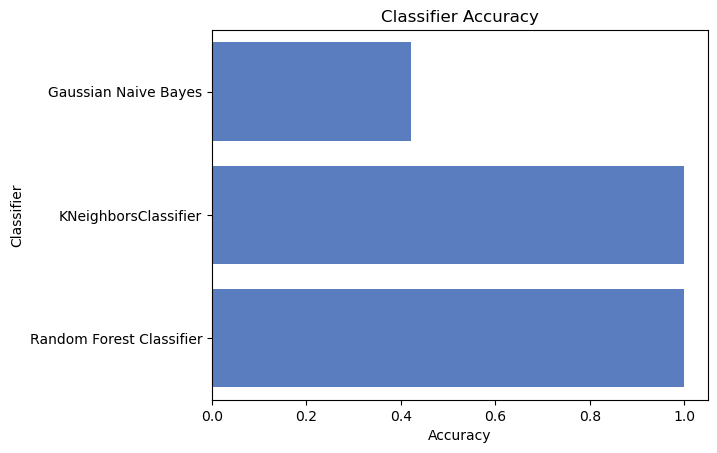

In [243]:
plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b");
plt.show()

## вывод

In [261]:
# Random Forest Classifier хороший метод для датасета потому что правильно задавая вопросы он хорошо воспринимает взаимосвязи.